In [1]:
#https://www.eeoc.gov/statistics/employment/jobpatterns/eeo1

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table

column_mapping_file = "ColumnHeaderInformation.csv"
EE01_dataset = "DiversityDataset.csv"
column_aggregate_all = 'TOTAL10'
industry_name = "NAICS2_Name"
str_columns = ['Nation', 'Region', 'Division', 'State', 'CBSA','County', 'NAICS2_Name',
                'NAICS3_Name']

def getColumnMappingDict():
    input_file = csv.DictReader(open(column_mapping_file))
    column_mapping = {}
    for row in input_file:
        column_label_split = row['Column Label'].split(",")
        column_label = {}
        for label in column_label_split:
            label_split = label.split(":")
            column_label[label_split[0].strip()]=label_split[1].strip()
        column_mapping[row['Column Name'].strip()]=column_label
    return column_mapping


def getColumnHeadersWithParticularLabel(column_mapping, label_race, label_sex, label_job):
    column_headers = set()
    for key,value in column_mapping.items():
        if label_race!='' and label_sex!='' and label_job !='' :
            if value['Race'] == label_race and value['Sex']==label_sex and value['Job']==label_job :
                column_headers.add(key)
        elif label_race =='' and label_sex!='' and label_job !='':
            if value['Sex']==label_sex and value['Job']==label_job:
                column_headers.add(key)
        elif label_race !='' and label_sex =='' and label_job !='':
            if value['Race'] == label_race and value['Job']==label_job:
                column_headers.add(key)
        elif label_race !='' and label_sex !='' and label_job =='':
            if value['Race'] == label_race and value['Sex']==label_sex:
                column_headers.add(key)
        else:
            print('Wrong Input')
    return list(column_headers)

def getDataFrameFromCSV(file_name):
    df = pd.read_csv("DiversityDataset.csv", encoding = "ISO-8859-1", engine='python')
    df.columns = df.columns.str.strip()
    column_list = list(df.columns)
    int_columns = [x for x in column_list if x not in str_columns]
    df[int_columns] = df[int_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
    return df

def getRelevantColumns(df, column_list):
    print("Using Columns from EE01 Dataset - ", column_list)
    df = df[column_list]
    return df

def plotPieChartForADataFrame(df, col_name_x, col_name_y, title, yLabel, xLabel):
    df=df.set_index(col_name_x)
    plot = df[col_name_y].plot.pie(
                    title=title, 
                   subplots=True, 
                   figsize=(25, 10), 
                   legend=None, 
                   ylabel=yLabel,
                   xlabel=xLabel,   
                  autopct='%1.1f%%')

def defineDataset(column_mapping):
    set_race = set()
    set_sex = set()
    set_job = set()
    for key,value in column_mapping.items():
        set_race.add(value['Race'])
        set_sex.add(value['Sex'])
        set_job.add(value['Job'])
    return list(set_race), list(set_sex), list(set_job)

def plotLineGraphForADataFrame(df, column_grouped_by, column_headers):
    y_axis = column_headers.remove(column_grouped_by)
    df.plot(x=column_grouped_by, y=y_axis, figsize=(8, 6))
    df=df.set_index(column_grouped_by)
    plt.xticks(rotation=90)
    plt.show()

def DrawComparisionBetweenColumnsForADataFrame(df, column_headers, column_grouped_by, title):
    df=df.groupby(column_grouped_by, as_index=False)[column_headers].sum()
    shape = df.shape
    columns_list = list(df.columns)
    if(shape[1]==2):
        plotPieChartForADataFrame(df, columns_list[0], columns_list[1], title,'', '')
    else:
        plotLineGraphForADataFrame(df, column_grouped_by, column_headers)

def renameDataFrameMapping(df, column_mapping, mapping_to_take):
    column_list = df.columns
    new_column_list = []
    rename_mapping = {}
    for column in column_list:
        if column in column_mapping:
            rename_mapping[column]=column_mapping[column][mapping_to_take]
            new_column_list.append(column_mapping[column][mapping_to_take])
        else:
            rename_mapping[column]=column
            new_column_list.append(column)
    df=df.rename(columns = rename_mapping)
    return df,new_column_list

In [2]:
column_mapping = getColumnMappingDict()
EE01_df = getDataFrameFromCSV(EE01_dataset)

Using Columns from EE01 Dataset -  ['TOTAL10', 'NAICS2_Name']


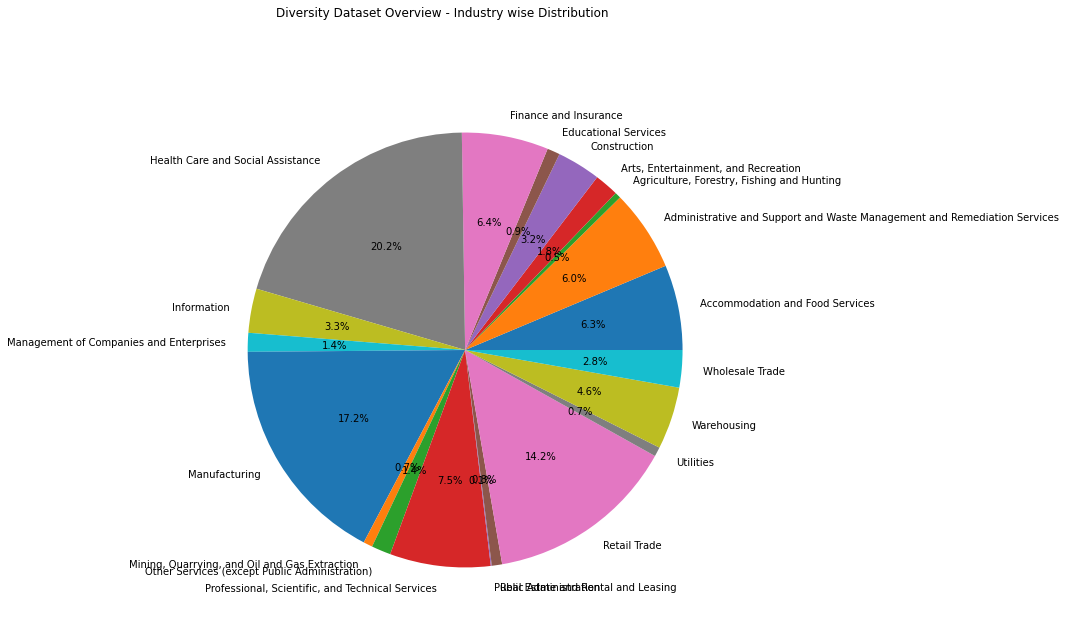

In [3]:
# Step 1 : Industry wise - Aggregate comparision
column_headers = getColumnHeadersWithParticularLabel(column_mapping, 'Aggregate', 'Aggregate', 'Aggregate')
column_headers.append(industry_name)
df = getRelevantColumns(EE01_df, column_headers)
DrawComparisionBetweenColumnsForADataFrame(df, column_headers, industry_name, 'Diversity Dataset Overview - Industry wise Distribution')

Using Columns from EE01 Dataset -  ['WHT10', 'ASIANT10', 'BLKT10', 'AIANT10', 'TOMRT10', 'NHOPIT10', 'TOTAL10', 'HISPT10', 'NAICS2_Name']


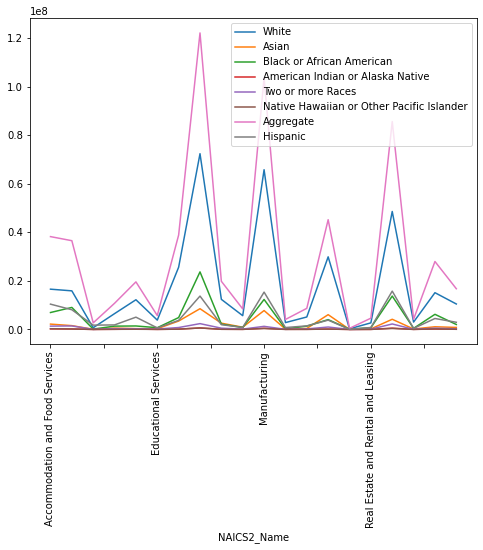

In [4]:
# Step 2 : Industry wise - Race comparision
column_headers = getColumnHeadersWithParticularLabel(column_mapping, '', 'Aggregate', 'Aggregate')
column_headers.append(industry_name)
df = getRelevantColumns(EE01_df, column_headers)
df,column_headers = renameDataFrameMapping(df, column_mapping, 'Race')
DrawComparisionBetweenColumnsForADataFrame(df, column_headers, industry_name, 'Diversity Dataset Overview - Industry wise Distribution')

Using Columns from EE01 Dataset -  ['TOTAL10', 'FT10', 'MT10', 'NAICS2_Name']


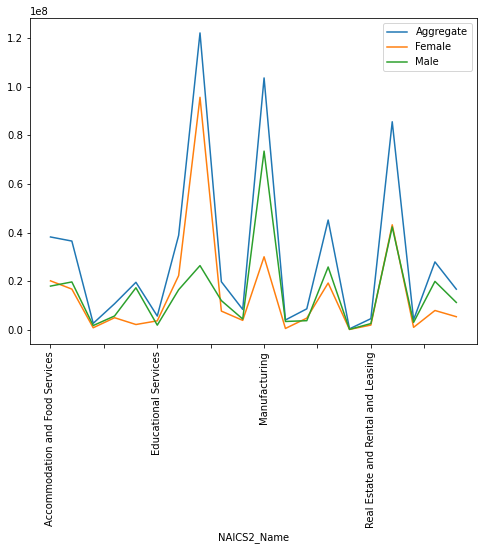

In [5]:
# Step 2 : Industry wise - Sex comparision
column_headers = getColumnHeadersWithParticularLabel(column_mapping, 'Aggregate', '', 'Aggregate')
column_headers.append(industry_name)
df = getRelevantColumns(EE01_df, column_headers)
df,column_headers = renameDataFrameMapping(df, column_mapping, 'Sex')
DrawComparisionBetweenColumnsForADataFrame(df, column_headers, industry_name, 'Diversity Dataset Overview - Industry wise Distribution')

Using Columns from EE01 Dataset -  ['TOTAL8', 'TOTAL9', 'TOTAL10', 'TOTAL5', 'TOTAL3', 'TOTAL4', 'TOTAL1_2', 'TOTAL7', 'TOTAL2', 'TOTAL1', 'TOTAL6', 'NAICS2_Name']


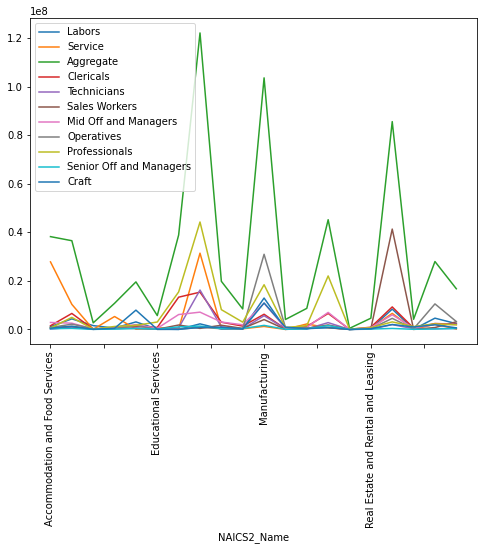

In [6]:
# Step 2 : Industry wise - Job Profile comparision
column_headers = getColumnHeadersWithParticularLabel(column_mapping, 'Aggregate', 'Aggregate', '')
column_headers.append(industry_name)
df = getRelevantColumns(EE01_df, column_headers)
df,column_headers = renameDataFrameMapping(df, column_mapping, 'Job')
DrawComparisionBetweenColumnsForADataFrame(df, column_headers, industry_name, 'Diversity Dataset Overview - Industry wise Distribution')